In [6]:
# Import required libraries
import pandas as pd

# Load the dataset
file_path = "/Users/vaanya/Downloads/Microwave_Recycling_Dataset.csv"
dataset = pd.read_csv(file_path)

# Display the first few rows of the dataset
print(dataset.head())


   Microwave Power (W)  Reaction Temperature (°C)  Reaction Time (minutes)  \
0                500.0                      350.0                     30.0   
1               1000.0                      400.0                     45.0   
2                750.0                      375.0                     40.0   
3               1000.0                      490.7                     38.0   
4                750.0                      469.9                     38.0   

      Catalyst Type  Catalyst Concentration (%)  \
0           Zeolite                         5.0   
1  Activated Carbon                        10.0   
2       No Catalyst                         0.0   
3           Alumina                         7.5   
4           Alumina                        14.9   

   Polycarbonate Composition (%)  Contaminant Levels (%)  \
0                           90.0                     5.0   
1                           85.0                    10.0   
2                           95.0            

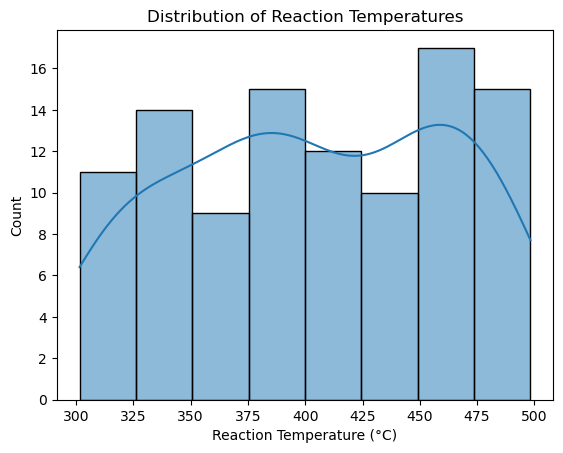

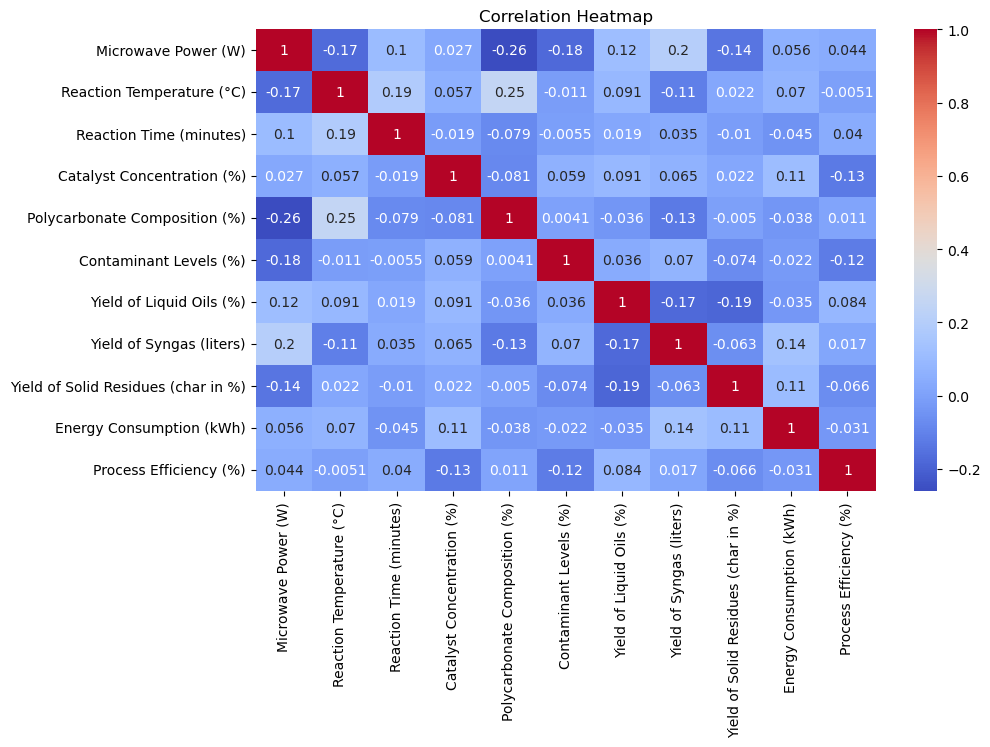

In [8]:
# Import visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Plot distribution of input parameters
sns.histplot(dataset["Reaction Temperature (°C)"], kde=True)
plt.title("Distribution of Reaction Temperatures")
plt.show()



# Select only numeric columns for correlation analysis
numeric_columns = dataset.select_dtypes(include=[np.number])

# Plot correlation heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(numeric_columns.corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()



In [9]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

# Define features and target variable
X = dataset[["Microwave Power (W)", "Reaction Temperature (°C)", "Reaction Time (minutes)",
             "Catalyst Concentration (%)", "Polycarbonate Composition (%)", "Contaminant Levels (%)"]]
y = dataset["Process Efficiency (%)"]

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a Random Forest Regressor
model = RandomForestRegressor(random_state=42)
model.fit(X_train, y_train)

# Evaluate the model
y_pred = model.predict(X_test)
print(f"Mean Squared Error: {mean_squared_error(y_test, y_pred):.2f}")


Mean Squared Error: 64.93


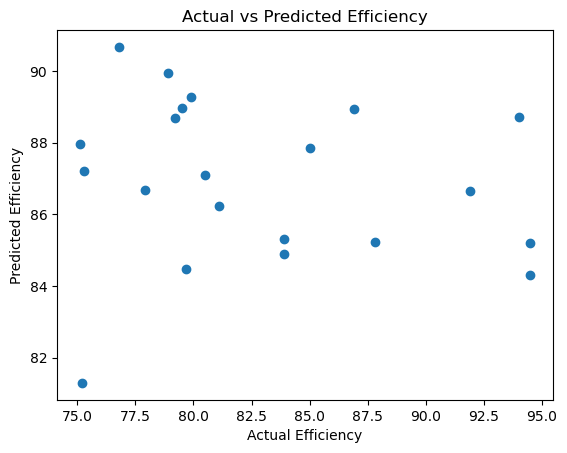

In [10]:
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Efficiency")
plt.ylabel("Predicted Efficiency")
plt.title("Actual vs Predicted Efficiency")
plt.show()


In [11]:
from sklearn.model_selection import GridSearchCV

# Example for RandomForest
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10, 20],
}
grid_search = GridSearchCV(RandomForestRegressor(), param_grid, cv=5)
grid_search.fit(X_train, y_train)
print("Best parameters:", grid_search.best_params_)


Best parameters: {'max_depth': 20, 'n_estimators': 200}


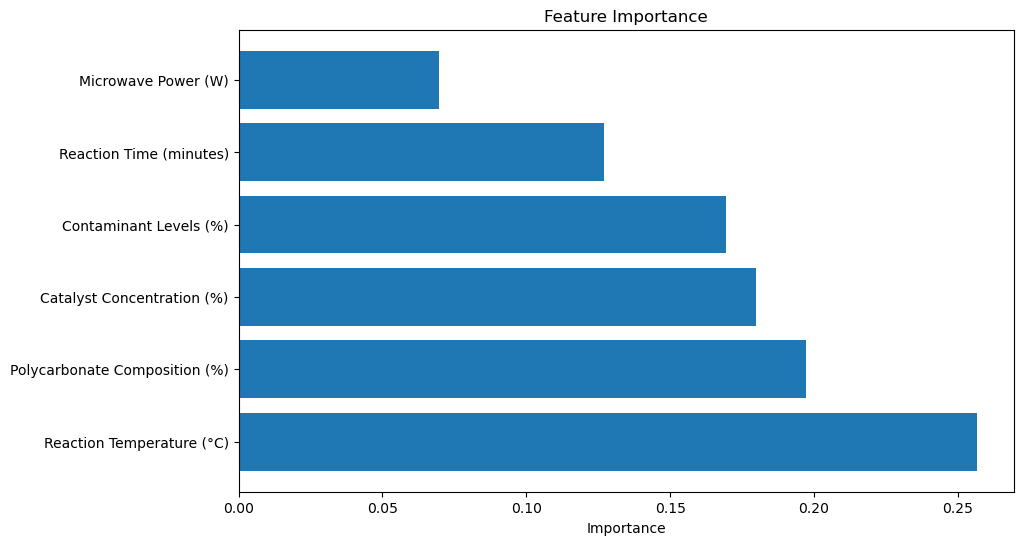

In [12]:
# Feature Importance for Random Forest
importances = model.feature_importances_
features = X.columns
indices = np.argsort(importances)[::-1]

# Plot feature importance
plt.figure(figsize=(10, 6))
plt.title("Feature Importance")
plt.barh(features[indices], importances[indices])
plt.xlabel("Importance")
plt.show()
